In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, cohen_kappa_score, classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample 

In [11]:
# set matplotlib defaults
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = (15,6)
mpl.rc('axes', labelsize=18)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
plt.rc('figure', titlesize=18)
plt.style.use('seaborn-darkgrid')

In [12]:
data = pd.read_csv("../data/dataset_2019_with_negatives.csv")

In [13]:
data = data.drop(columns=['year', 'precipAccumulation'])

In [14]:
boroughs = pd.read_csv("../data/localidades.csv")

In [15]:
data = data.merge(boroughs[['id', 'borough']], left_on='borough', right_on='borough')
data.rename(columns={"id": 'borough_id'}, inplace=True)
data.head(25)

,x,y,timestamp,date,day_of_year,month,day,hour,address,severity,...,windSpeed,windBearing,cloudCover,uvIndex,visibility,pressure,windGust,precipType,ozone,borough_id
0,-74.134363,4.579297,2019-01-11 14:20:00,2019-01-11,11,1,11,14,KR 26-CL 52B S 2,Injury,...,1.66,167.0,0.89,4.0,13.489,1018.0,1.66,rain,239.8,6
1,-74.139488,4.573233,2019-01-11 14:00:00,2019-01-11,11,1,11,14,AV AVENIDA BOYACA-KR 24 2,NaN,...,1.66,167.0,0.89,4.0,13.489,1018.0,1.66,rain,239.8,6
2,-74.135804,4.588874,2019-01-11 17:38:00,2019-01-11,11,1,11,17,CL 49A-KR 37 S 2,Injury,...,1.90,225.0,0.95,7.0,12.000,1016.3,2.17,rain,237.6,6
3,-74.123576,4.558440,2019-01-11 17:00:00,2019-01-11,11,1,11,17,CL 52-KR 10A S 2,NaN,...,1.90,225.0,0.95,7.0,12.000,1016.3,2.17,rain,237.6,6
4,-74.138016,4.566990,2019-01-24 12:00:00,2019-01-24,24,1,24,12,AV AVENIDA BOYACA-KR 19C 2,Injury,...,3.37,129.0,0.67,0.0,15.142,1016.2,5.20,rain,240.4,6
5,-74.139201,4.589385,2019-01-24 12:00:00,2019-01-24,24,1,24,12,TR 44-CL 51A S 02,NaN,...,3.37,129.0,0.67,0.0,15.142,1016.2,5.20,rain,240.4,6
6,-74.142594,4.580252,2019-04-24 14:30:00,2019-04-24,114,4,24,14,AV AVENIDA JORGE GAITAN CORTES-AV AVENIDA BOYA...,Material damage,...,1.50,77.0,0.99,5.0,2.976,1019.3,2.30,rain,249.9,6
7,-74.129479,4.564287,2019-08-13 19:30:00,2019-08-13,225,8,13,19,CL 55-KR 15 S 02,Injury,...,3.05,140.0,0.94,6.0,9.508,1013.8,4.19,rain,255.8,6
8,-74.140921,4.577249,2019-08-19 08:38:00,2019-08-19,231,8,19,8,CL 56A-KR 27 S 2,Injury,...,2.02,112.0,0.75,0.0,16.093,1018.2,3.09,rain,257.8,6
9,-74.130654,4.576701,2019-08-02 20:20:00,2019-08-02,214,8,2,20,CL 48C-KR 23F S 2,Injury,...,2.41,152.0,0.88,5.0,10.306,1012.0,3.02,rain,255.0,6


In [21]:
data = pd.get_dummies(data, columns=['summary'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174354 entries, 0 to 174353
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   x                            174354 non-null  float64
 1   y                            174354 non-null  float64
 2   timestamp                    174354 non-null  object 
 3   date                         174354 non-null  object 
 4   day_of_year                  174354 non-null  int64  
 5   month                        174354 non-null  int64  
 6   day                          174354 non-null  int64  
 7   hour                         174354 non-null  int64  
 8   address                      174354 non-null  object 
 9   severity                     29053 non-null   object 
 10  accident_type                29053 non-null   object 
 11  severity_numeric             29053 non-null   float64
 12  borough                      174354 non-null  object 
 13 

In [23]:
corr = data.corr()
c1 = corr.abs().unstack().round(3)
c1<1
c1[(c1<1) & (c1> 0.65)].sort_values(ascending = False)

apparentTemperature          temperature                    0.998
temperature                  apparentTemperature            0.998
day_of_year                  month                          0.996
month                        day_of_year                    0.996
temperature                  uvIndex                        0.835
uvIndex                      temperature                    0.835
windSpeed                    windGust                       0.828
windGust                     windSpeed                      0.828
apparentTemperature          uvIndex                        0.826
uvIndex                      apparentTemperature            0.826
precipProbability            precipIntensity                0.786
precipIntensity              precipProbability              0.786
hour                         temperature                    0.698
temperature                  hour                           0.698
apparentTemperature          hour                           0.691
hour      

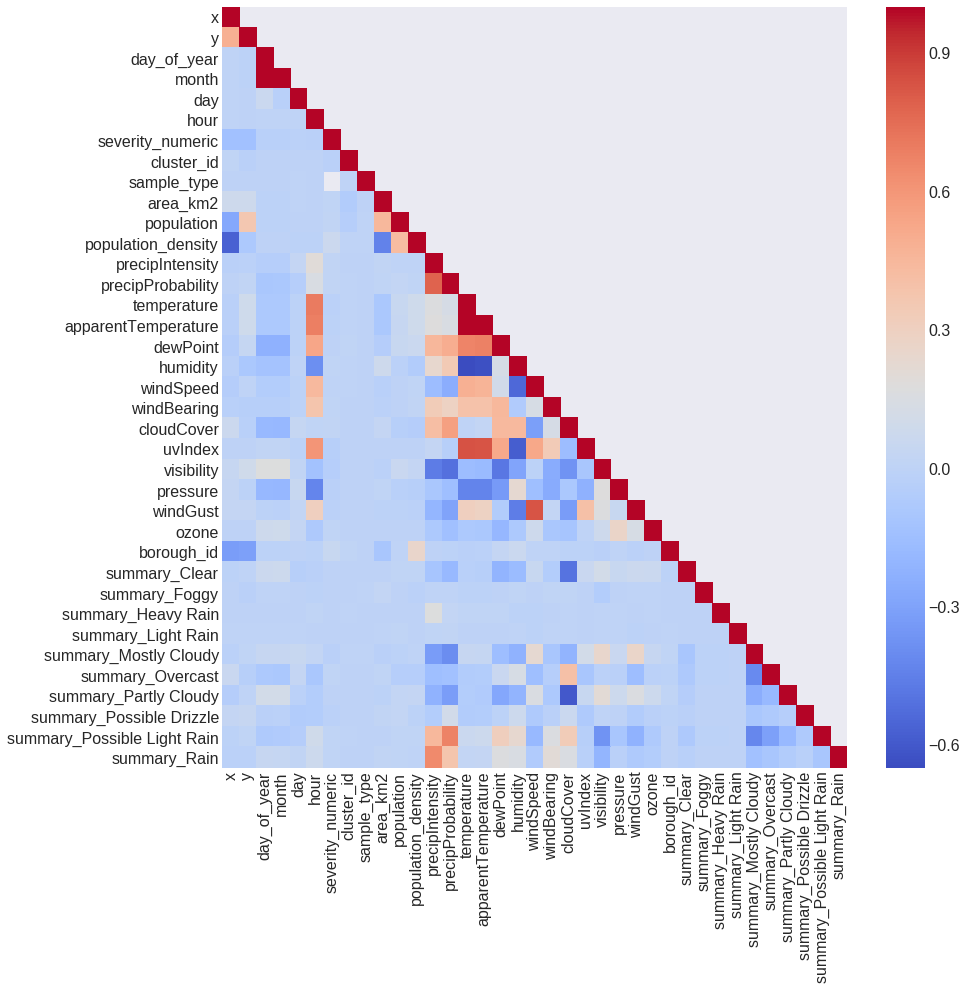

In [24]:
plt.figure(figsize=(14,14))
sns.heatmap(corr.where(np.tril(np.ones(corr.shape)).astype(np.bool)), cmap='coolwarm')
plt.show()

## Useful Functions

In [248]:
def get_df(columns):
    return data[columns]

In [249]:
def separate_classes(df):
    return df[df.sample_type==0], df[df.sample_type==1]

In [250]:
def resample_df(resample_type, df_majority, df_minority):
    if resample_type == 'up':
        # Upsample minority class
        df_minority_upsampled = resample(df_minority, replace=True, n_samples=df_majority.shape[0])        
        # Combine majority class with upsampled minority class
        df_upsampled = pd.concat([df_majority, df_minority_upsampled])
        
        return df_upsampled

    if resample_type == 'down':
        # Upsample minority class
        df_majority_undersampled = resample(df_majority, replace=False, n_samples=df_minority.shape[0])        
        # Combine majority class with upsampled minority class
        df_undersampled = pd.concat([df_minority, df_majority_undersampled])
        
        return df_undersampled 

In [308]:
def train_test_df(df, columns):
    cols = columns
    cols.remove('sample_type')
    X = df[columns]
    y = df.sample_type
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    return X_train, X_test, y_train, y_test  

In [263]:
def model_fit_predict(X_train, X_test, y_train, y_test):
    categories = ['non-accident', 'accident']
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring= 'f1_weighted', n_jobs=-1)
    print('Weigthed F1 score: {:.2f} (+/- {:.3f} )'.format(scores.mean(), scores.std() * 2))

    y_pred = clf.predict(X_test)
    print('Cohen kappa score {:.4f}'.format(cohen_kappa_score(y_pred, y_test)))
    print(classification_report(y_test, y_pred,target_names=categories))

    metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
    scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
    cv = KFold(n_splits=10)
    scv = StratifiedKFold(n_splits=10)
    for metric in metric_names:
        score1 = cross_val_score(clf, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1).mean()
        score2 = cross_val_score(clf, X_train, y_train, scoring=metric, cv=scv, n_jobs=-1).mean()
        scores_df.loc[metric] = [score1, score2]
    print(scores_df)
    y_pred_proba = clf.predict_proba(X_test)[:,1]

    return clf, y_pred, y_pred_proba


In [341]:
def model_plot(y_test, y_pred, y_pred_proba, model_name):
    categories = ['non-accident', 'accident']
    gs = mpl.gridspec.GridSpec(2, 2)

    plt.figure(figsize=(14,10))
    ax = plt.subplot(gs[0, 0]) # row 0, col 0
    labels = [0,1]
    cnf_mx = confusion_matrix(y_test,y_pred,labels=labels)
    ax1 = sns.heatmap(cnf_mx, cmap='coolwarm',annot=True, fmt="d")
    plt.xticks([0.5,1.5],categories, rotation=0)
    plt.yticks([0.5,1.5],categories, rotation=0)
    plt.title(f'Confusion matrix {model_name}', fontsize=18)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    ax = plt.subplot(gs[0, 1]) # row 0, col 1
    row_sums = cnf_mx.sum(axis=1, keepdims=True)
    norm_cnf_mx = cnf_mx / row_sums
    np.fill_diagonal(norm_cnf_mx, 0)
    ax2 = sns.heatmap(norm_cnf_mx, cmap='coolwarm',annot=True, fmt=".4%")
    plt.xticks([0.5,1.5],categories, rotation=0)
    plt.yticks([0.5,1.5],categories, rotation=0)
    plt.title(f'Error matrix {model_name}', fontsize=18)
    plt.xlabel('Predicted label')

    ax = plt.subplot(gs[1, :]) # row 1, span all columns
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    # Display plot for AUC curve
    ax3 = plt.plot(fpr,tpr,label= f"{model_name}, auc={round(auc,4)}")
    ax3 = plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    plt.legend(fontsize=14)
    plt.title(f"ROC cuve: {model_name}", fontsize= 18)
    plt.tight_layout()
    plt.show()

## Model 0

### All Variables. Unbalanced Classes

In [342]:
feature_columns_model_0 = ['x', 'y', 'month', 'day', 'day_of_year', 'hour',
       'cluster_id', 'area_km2', 'population',
       'population_density', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'windSpeed', 'windBearing', 'cloudCover', 'uvIndex', 'visibility',
       'pressure', 'windGust', 'ozone', 'borough_id', 'summary_Clear',
       'summary_Foggy', 'summary_Heavy Rain', 'summary_Light Rain',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Drizzle', 'summary_Possible Light Rain',
       'summary_Rain', 'sample_type']
X_train, X_test, y_train, y_test = train_test_df(data, feature_columns_model_0)

In [333]:
clf0, y_pred_0, y_pred_proba_0 = model_fit_predict(X_train, X_test, y_train, y_test)

Weigthed F1 score: 0.76 (+/- 0.000 )
Cohen kappa score 0.0000
              precision    recall  f1-score   support

non-accident       0.83      1.00      0.91     47909
    accident       0.00      0.00      0.00      9628

    accuracy                           0.83     57537
   macro avg       0.42      0.50      0.45     57537
weighted avg       0.69      0.83      0.76     57537

                  Random-CV Stratified-CV
f1                        0             0
roc_auc            0.492924       0.49284
average_precision  0.163204      0.163391
accuracy           0.833689      0.833689
precision                 0             0
recall                    0             0


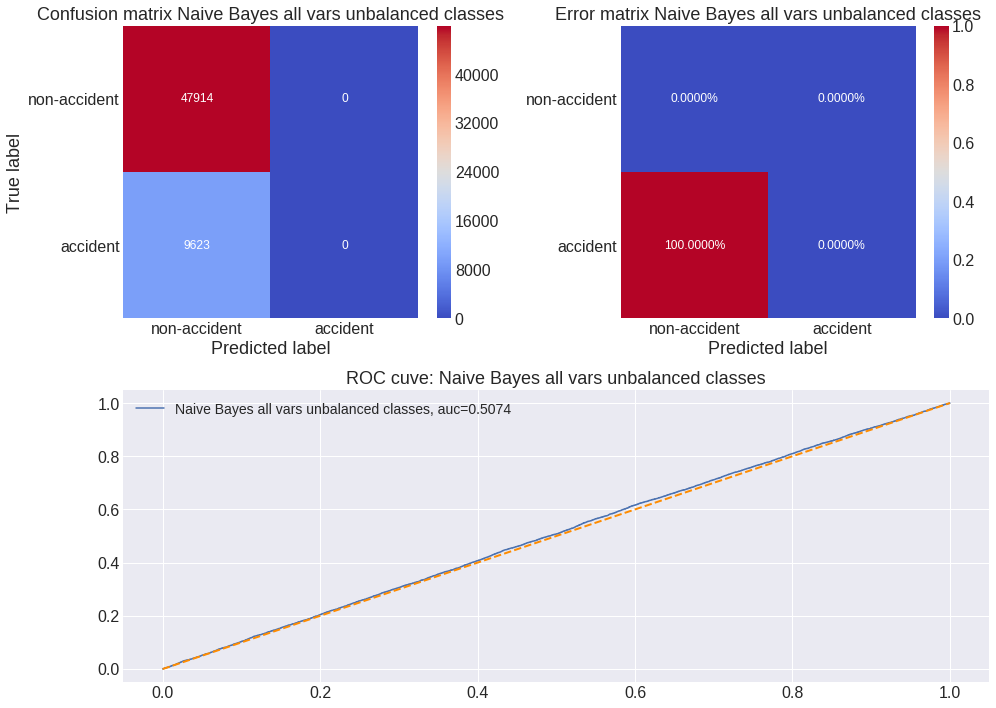

In [343]:
model_plot(y_test, y_pred_0, y_pred_proba_0, 'Naive Bayes all vars unbalanced classes')

## First model

###  All variables. Balanced Classes

In [345]:
feature_columns_model_1 = ['x', 'y', 'month', 'day', 'day_of_year', 'hour',
       'cluster_id', 'area_km2', 'population',
       'population_density', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'windSpeed', 'windBearing', 'cloudCover', 'uvIndex', 'visibility',
       'pressure', 'windGust', 'ozone', 'borough_id', 'summary_Clear',
       'summary_Foggy', 'summary_Heavy Rain', 'summary_Light Rain',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Drizzle', 'summary_Possible Light Rain',
       'summary_Rain', 'sample_type']

In [313]:
df_majority_1, df_minority_1 = separate_classes(get_df(feature_columns_model_1))

### Upsampling

In [314]:
df_upsampled_1 = resample_df('up', df_majority_1, df_minority_1)
X_train, X_test, y_train, y_test = train_test_df(df_upsampled_1, feature_columns_model_1)

In [315]:
clf1, y_pred_1, y_pred_proba_1 = model_fit_predict(X_train, X_test, y_train, y_test)

Weigthed F1 score: 0.50 (+/- 0.009 )
Cohen kappa score -0.0060
              precision    recall  f1-score   support

non-accident       0.50      0.60      0.55     48011
    accident       0.50      0.39      0.44     47888

    accuracy                           0.50     95899
   macro avg       0.50      0.50      0.49     95899
weighted avg       0.50      0.50      0.49     95899

                  Random-CV Stratified-CV
f1                 0.442386      0.443491
roc_auc            0.504709      0.504747
average_precision  0.503472      0.503535
accuracy           0.503166      0.503531
precision          0.504579      0.504845
recall             0.394711      0.396179


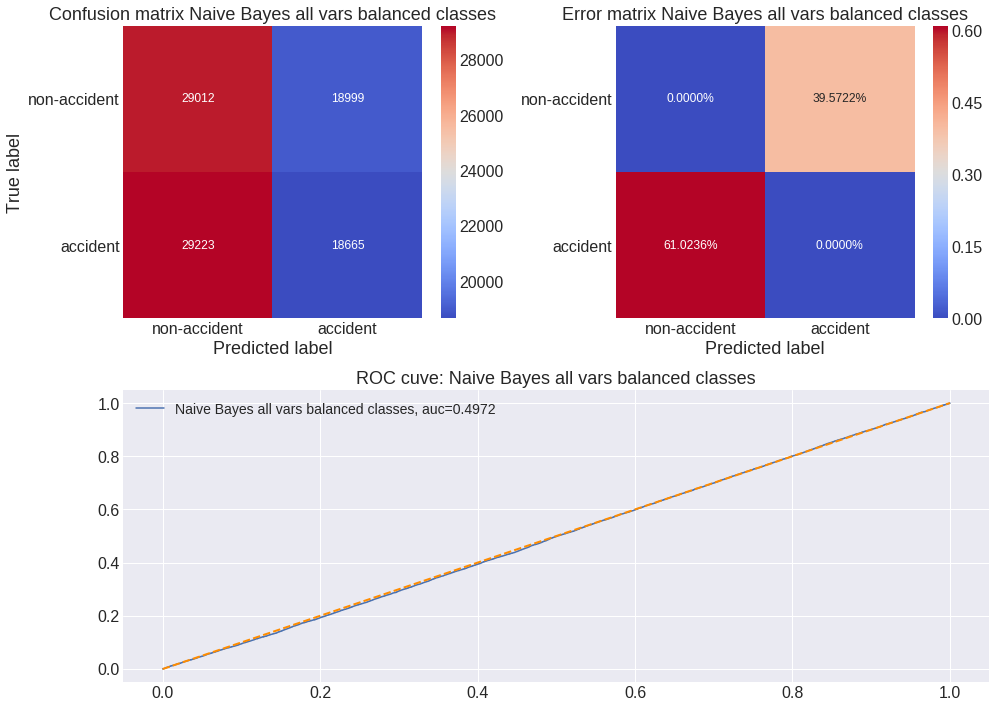

In [316]:
model_plot(y_test, y_pred_1, y_pred_proba_1, 'Naive Bayes all vars balanced classes')

In [346]:
df_downsampled_1 = resample_df('down', df_majority_1, df_minority_1)
X_train, X_test, y_train, y_test = train_test_df(df_downsampled_1, feature_columns_model_1)

In [347]:
clf1, y_pred_12, y_pred_proba_12 = model_fit_predict(X_train, X_test, y_train, y_test)

Weigthed F1 score: 0.48 (+/- 0.024 )
Cohen kappa score -0.0048
              precision    recall  f1-score   support

non-accident       0.50      0.70      0.58      9578
    accident       0.50      0.30      0.37      9597

    accuracy                           0.50     19175
   macro avg       0.50      0.50      0.48     19175
weighted avg       0.50      0.50      0.48     19175

                  Random-CV Stratified-CV
f1                 0.397125      0.398033
roc_auc            0.490183      0.490611
average_precision  0.495782      0.495907
accuracy           0.494387      0.495723
precision          0.492909      0.493555
recall             0.346495      0.342584


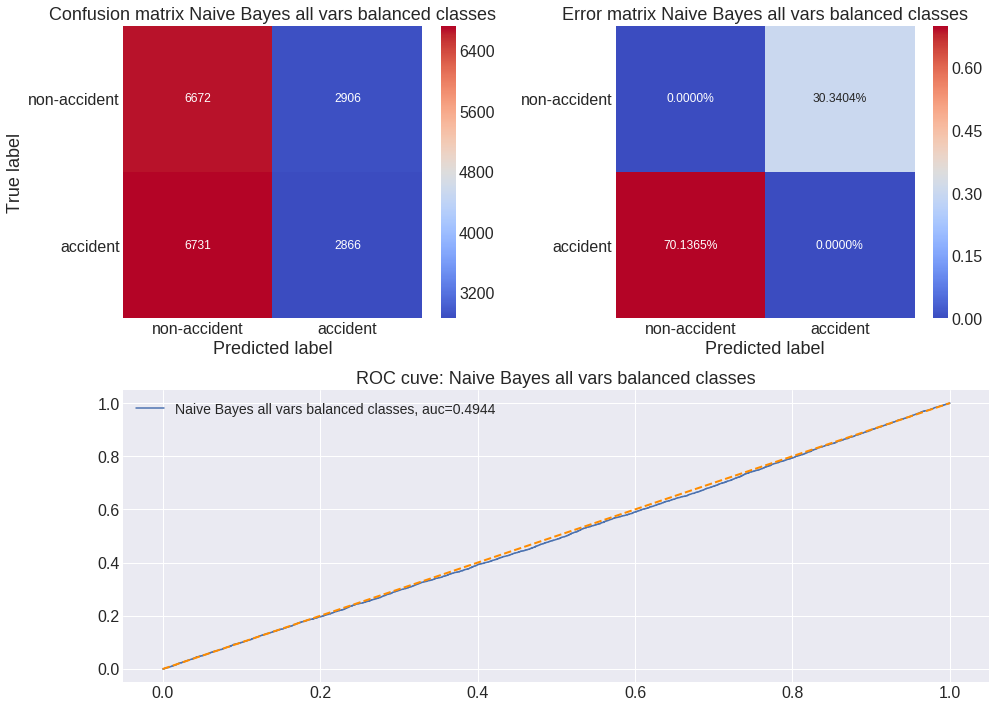

In [348]:
model_plot(y_test, y_pred_12, y_pred_proba_12, 'Naive Bayes all vars balanced classes')

## Second model

###  Numeric weather Covariates. Balanced classes

In [358]:
columns_model_2 = ['x', 'y', 'day_of_year', 'hour',
       'cluster_id','population_density', 'precipIntensity', 'precipProbability',
       'temperature', 'dewPoint', 'humidity','windSpeed', 
       'cloudCover', 'visibility', 'pressure', 'borough_id', 'sample_type']
data.columns 

Index(['x', 'y', 'timestamp', 'date', 'day_of_year', 'month', 'day', 'hour',
       'address', 'severity', 'accident_type', 'severity_numeric', 'borough',
       'cluster_id', 'sample_type', 'area_km2', 'population',
       'population_density', 'timestamp_darksky', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility', 'pressure', 'windGust', 'precipType', 'ozone',
       'borough_id', 'summary_Clear', 'summary_Foggy', 'summary_Heavy Rain',
       'summary_Light Rain', 'summary_Mostly Cloudy', 'summary_Overcast',
       'summary_Partly Cloudy', 'summary_Possible Drizzle',
       'summary_Possible Light Rain', 'summary_Rain'],
      dtype='object')

In [357]:
feature_selection_1 = get_df(feature_columns_model_2)

KeyError: "['precipitation_probability_intesity'] not in index"

In [351]:
df_majority_1, df_minority_1 = separate_classes(feature_selection_1)

AttributeError: 'DataFrame' object has no attribute 'sample_type'

In [90]:
feature_selection_1

,x,y,day_of_year,hour,cluster_id,population_density,precipIntensity,precipProbability,temperature,dewPoint,humidity,windSpeed,cloudCover,visibility,pressure,borough_id,sample_type,precipitation_probability_intesity
0,-74.134363,4.579297,11,14,-1,20124.11,0.3083,0.22,13.03,11.88,0.93,1.66,0.89,13.489,1018.0,6,1,0.067826
1,-74.139488,4.573233,11,14,586,20124.11,0.3083,0.22,13.03,11.88,0.93,1.66,0.89,13.489,1018.0,6,0,0.067826
2,-74.135804,4.588874,11,17,-1,20124.11,1.6823,0.35,14.98,13.98,0.94,1.90,0.95,12.000,1016.3,6,1,0.588805
3,-74.123576,4.558440,11,17,275,20124.11,1.6823,0.35,14.98,13.98,0.94,1.90,0.95,12.000,1016.3,6,0,0.588805
4,-74.138016,4.566990,24,12,33,20124.11,0.1040,0.08,11.85,10.06,0.89,3.37,0.67,15.142,1016.2,6,1,0.008320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174349,-74.364048,3.985513,5,13,-1,8.36,0.0906,0.08,5.69,4.32,0.91,3.04,0.44,13.723,1019.8,20,0,0.007248
174350,-74.364048,3.985513,232,13,-1,8.36,0.2862,0.12,5.61,5.39,0.98,2.17,0.75,6.701,1020.7,20,0,0.034344
174351,-74.364001,3.985578,149,6,-1,8.36,0.5873,0.17,6.03,6.03,1.00,1.64,0.99,7.132,1018.0,20,0,0.099841
174352,-74.364001,3.985578,212,6,-1,8.36,0.0072,0.08,3.99,3.62,0.97,2.47,0.46,16.093,1018.9,20,0,0.000576


In [91]:
feature_selection_1 = feature_selection_1.drop(columns=['precipIntensity', 'precipProbability'])

In [92]:
feature_selection_1.head(2)

,x,y,day_of_year,hour,cluster_id,population_density,temperature,dewPoint,humidity,windSpeed,cloudCover,visibility,pressure,borough_id,sample_type,precipitation_probability_intesity
0,-74.134363,4.579297,11,14,-1,20124.11,13.03,11.88,0.93,1.66,0.89,13.489,1018.0,6,1,0.067826
1,-74.139488,4.573233,11,14,586,20124.11,13.03,11.88,0.93,1.66,0.89,13.489,1018.0,6,0,0.067826


In [93]:
# Separate majority and minority classes
df_majority_fs_1 = feature_selection_1[feature_selection_1.sample_type==0]
df_minority_fs1 = feature_selection_1[feature_selection_1.sample_type==1]
print(df_majority_fs_1.shape, df_minority_fs1.shape)

(145301, 16) (29053, 16)


In [94]:
# Upsample minority class
df_minority_upsampled_fs1 = resample(df_minority_fs1, replace=True, n_samples=29053*5)
 
# Combine majority class with upsampled minority class
df_upsampled_fs1 = pd.concat([df_majority_fs_1, df_minority_upsampled_fs1])
 
# Display new class counts
df_upsampled_fs1.sample_type.value_counts()

0    145301
1    145265
Name: sample_type, dtype: int64

In [95]:
df_majority_fs_1.columns

Index(['x', 'y', 'day_of_year', 'hour', 'cluster_id', 'population_density',
       'temperature', 'dewPoint', 'humidity', 'windSpeed', 'cloudCover',
       'visibility', 'pressure', 'borough_id', 'sample_type',
       'precipitation_probability_intesity'],
      dtype='object')

In [98]:
feature_columns_model_2 = ['x', 'y', 'day_of_year', 'hour', 'cluster_id',
                            'population_density', 'temperature', 'dewPoint', 'humidity',
                            'windSpeed', 'cloudCover', 'visibility', 'pressure',
                            'borough_id', 'precipitation_probability_intesity']

In [99]:
X = df_upsampled_fs1[feature_columns_model_2]
y = df_upsampled_fs1.sample_type

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [101]:
categories = ['accident', 'non-accident']
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring= 'f1_weighted', n_jobs=-1)
print('Weigthed F1 score: {:.2f} (+/- {:.3f} )'.format(scores.mean(), scores.std() * 2))

Weigthed F1 score: 0.49 (+/- 0.013 )


In [102]:
y_pred = clf3.predict(X_test)
print('Cohen kappa score {:.4f}'.format(cohen_kappa_score(y_pred, y_test)))
print(classification_report(y_test, y_pred,target_names=categories))

Cohen kappa score 0.0003
              precision    recall  f1-score   support

    accident       0.50      0.62      0.55     47734
non-accident       0.50      0.38      0.43     48153

    accuracy                           0.50     95887
   macro avg       0.50      0.50      0.49     95887
weighted avg       0.50      0.50      0.49     95887



In [103]:
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=10)
scv = StratifiedKFold(n_splits=10)
for metric in metric_names:
    score1 = cross_val_score(clf3, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1).mean()
    score2 = cross_val_score(clf3, X_train, y_train, scoring=metric, cv=scv, n_jobs=-1).mean()
    scores_df.loc[metric] = [score1, score2]

In [104]:
scores_df

,Random-CV,Stratified-CV
f1,0.431082,0.433217
roc_auc,0.502204,0.502172
average_precision,0.499217,0.499173
accuracy,0.499864,0.500511
precision,0.499115,0.499345
recall,0.383815,0.385276


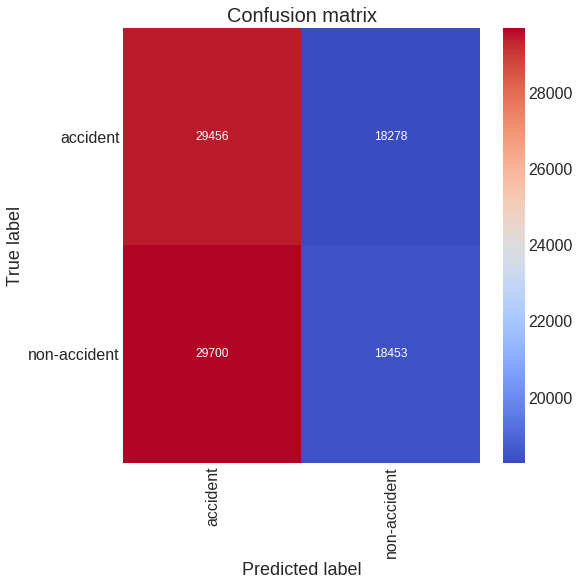

In [105]:
cnf_mx = confusion_matrix(y_test,y_pred,labels=y.unique())
plt.figure(figsize=(8,8))
sns.heatmap(cnf_mx, cmap='coolwarm',annot=True, fmt="d")
plt.xticks([0.5,1.5],categories, rotation=90)
plt.yticks([0.5,1.5],categories, rotation=0)
plt.title('Confusion matrix', fontsize=20)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

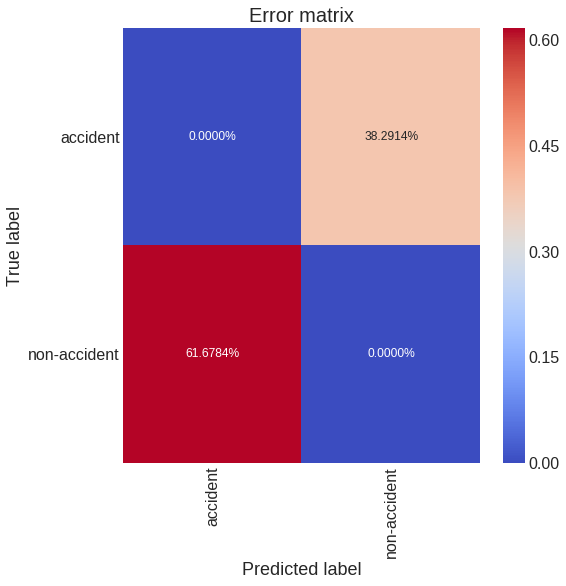

In [106]:
row_sums = cnf_mx.sum(axis=1, keepdims=True)
norm_cnf_mx = cnf_mx / row_sums
np.fill_diagonal(norm_cnf_mx, 0)
plt.figure(figsize=(8,8))
sns.heatmap(norm_cnf_mx, cmap='coolwarm',annot=True, fmt=".4%")
plt.xticks([0.5,1.5],categories, rotation=90)
plt.yticks([0.5,1.5],categories, rotation=0)
plt.title('Error matrix', fontsize=20)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

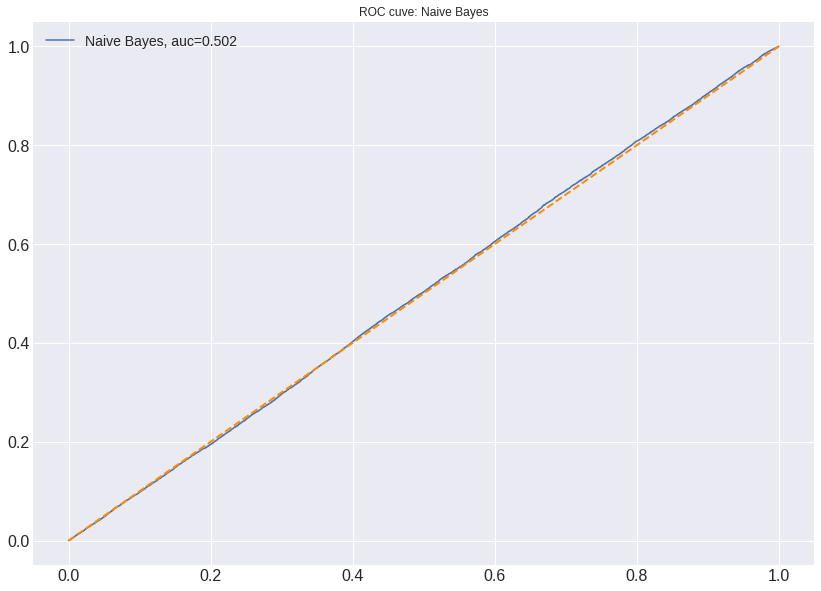

0.5023

In [107]:
roc_curve(clf3.predict_proba(X_test)[:,1], y_test, "Naive Bayes")

### Categorical weather covariates. Balanced Classes

In [180]:
columns_model_3 = ['x', 'y', 'day_of_year', 'hour',
       'cluster_id', 'population_density', 'borough_id', 'summary_Clear',
       'summary_Foggy', 'summary_Heavy Rain', 'summary_Light Rain',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Drizzle', 'summary_Possible Light Rain',
       'summary_Rain', 'sample_type']

Majority class size: (145301, 18) 
Minority class size: (29053, 18)


In [158]:
model21_df = resample_df('up', df_majority_fs_2, df_minority_fs2)

In [182]:
X_train, X_test, y_train, y_test = train_test_df(model21_df, columns_model_3)

In [219]:
clf4, y_pred4, y_pred_proba4 = model_fit_predict(X_train, X_test, y_train, y_test)

Weigthed F1 score: 0.50 (+/- 0.009 )
Cohen kappa score 0.0059
              precision    recall  f1-score   support

    accident       0.50      0.53      0.51     47930
non-accident       0.50      0.48      0.49     47969

    accuracy                           0.50     95899
   macro avg       0.50      0.50      0.50     95899
weighted avg       0.50      0.50      0.50     95899

                  Random-CV Stratified-CV
f1                 0.497342      0.496459
roc_auc            0.498759      0.498768
average_precision   0.50009      0.500056
accuracy            0.49953      0.499535
precision          0.499478      0.499412
recall             0.496131       0.49436


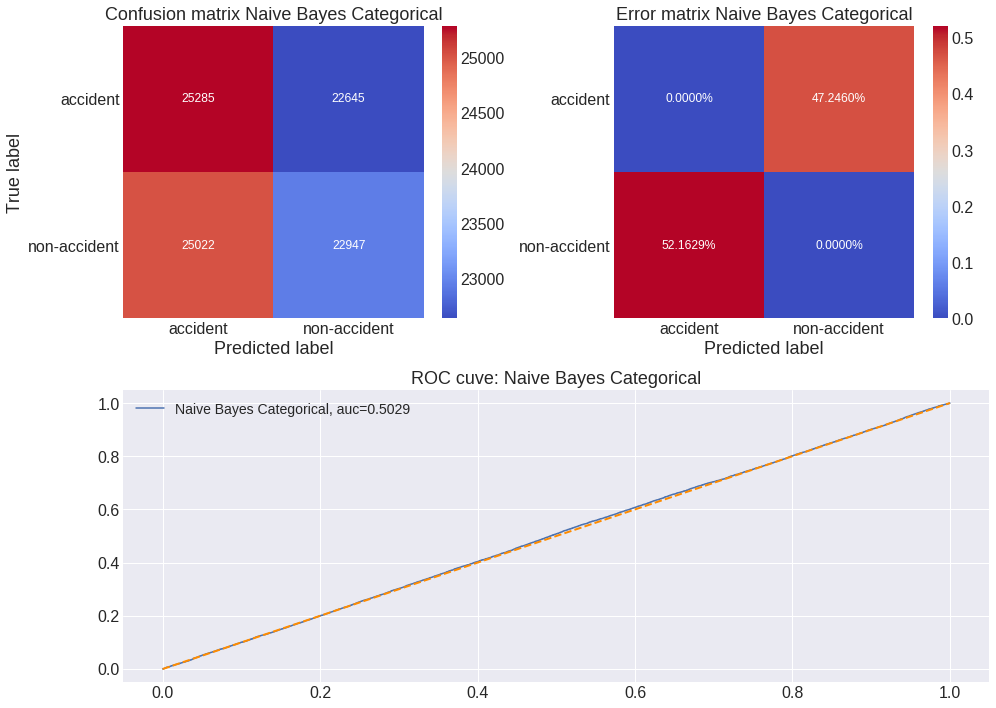

In [247]:
model_plot(y_test, y_pred4, y_pred_proba4,  'Naive Bayes Categorical')